# Problem Statement:

## To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
## (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
## Also, if some data pre-processing is necessary do that as well.


## Attribute Information:
##### • cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
##### • cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
##### • cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y
##### • bruises: bruises=t, no=f
##### • odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s
##### • gill-attachment: attached=a, descending=d, free=f, notched=n
##### • gill-spacing: close=c, crowded=w, distant=d
##### • gill-size: broad=b, narrow=n
##### • gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o,pink=p, purple=u, red=e, white=w, yellow=y
##### • stalk-shape: enlarging=e, tapering=t
##### • Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r,missing=?
##### • stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
##### • stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
##### • stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y
##### • stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y
##### • veil-type: partial=p, universal=u
##### • veil-colour: brown=n, orange=o, white=w, yellow=y
##### • ring-number: none=n, one=o, two=t
##### • ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z
##### • spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y
##### • population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y
##### • habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,woods=d 

In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset into python environment
data = pd.read_csv('mushrooms (1).csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Preprocessing

### 1.Handling missing values

In [4]:
#check values in stalk-root column
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [5]:
#in stalk-root column the '?' represents missing values. So we have to convert it into null values
data.replace({'?': np.nan}, inplace=True)

In [6]:
data['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [7]:
#check for missing values
data.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

There are 2480 missing values in 'stalk-root' column.

In [8]:
data['stalk-shape'].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [9]:
#here we will fill missing values of stalk-root column with its mode, with respect to stalk-shape categories
data.loc[(data['stalk-root'].isna()) & (data['stalk-shape']=='t'),'stalk-root']=data[data['stalk-shape']=='t']['stalk-root'].mode()[0]
data.loc[(data['stalk-root'].isna()) & (data['stalk-shape']=='e'),'stalk-root']=data[data['stalk-shape']=='e']['stalk-root'].mode()[0]

In [10]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Now there are no missing values in the dataset.

### 2. Encoding

In [11]:
#one hot encoding
data1=pd.get_dummies(data[['cap-shape','cap-surface','veil-type','gill-attachment']])

#concat data frames data and data1 and then dropping the columns which are one hot encoded
data=pd.concat([data,data1], axis=1)
data=data.drop(['cap-shape','cap-surface','veil-type','gill-attachment'],axis=1)

In [15]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in data[['class','cap-color','bruises','odor','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]:
    data[i]=label_en.fit_transform(data[i])

In [16]:
data.head()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,veil-type_p,gill-attachment_a,gill-attachment_f
0,1,4,1,6,0,1,4,0,2,2,...,0,0,1,0,0,1,0,1,0,1
1,0,9,1,0,0,0,4,0,1,2,...,0,0,1,0,0,1,0,1,0,1
2,0,8,1,3,0,0,5,0,1,2,...,0,0,0,0,0,1,0,1,0,1
3,1,8,1,6,0,1,5,0,2,2,...,0,0,1,0,0,0,1,1,0,1
4,0,3,0,5,1,0,4,1,2,2,...,0,0,1,0,0,1,0,1,0,1


Thus all the columns are encoded.

In cloumn 'class', '1' corresponds to 'poisonous' and '0' corresponds to 'edible'.

### 3. Feature Reduction

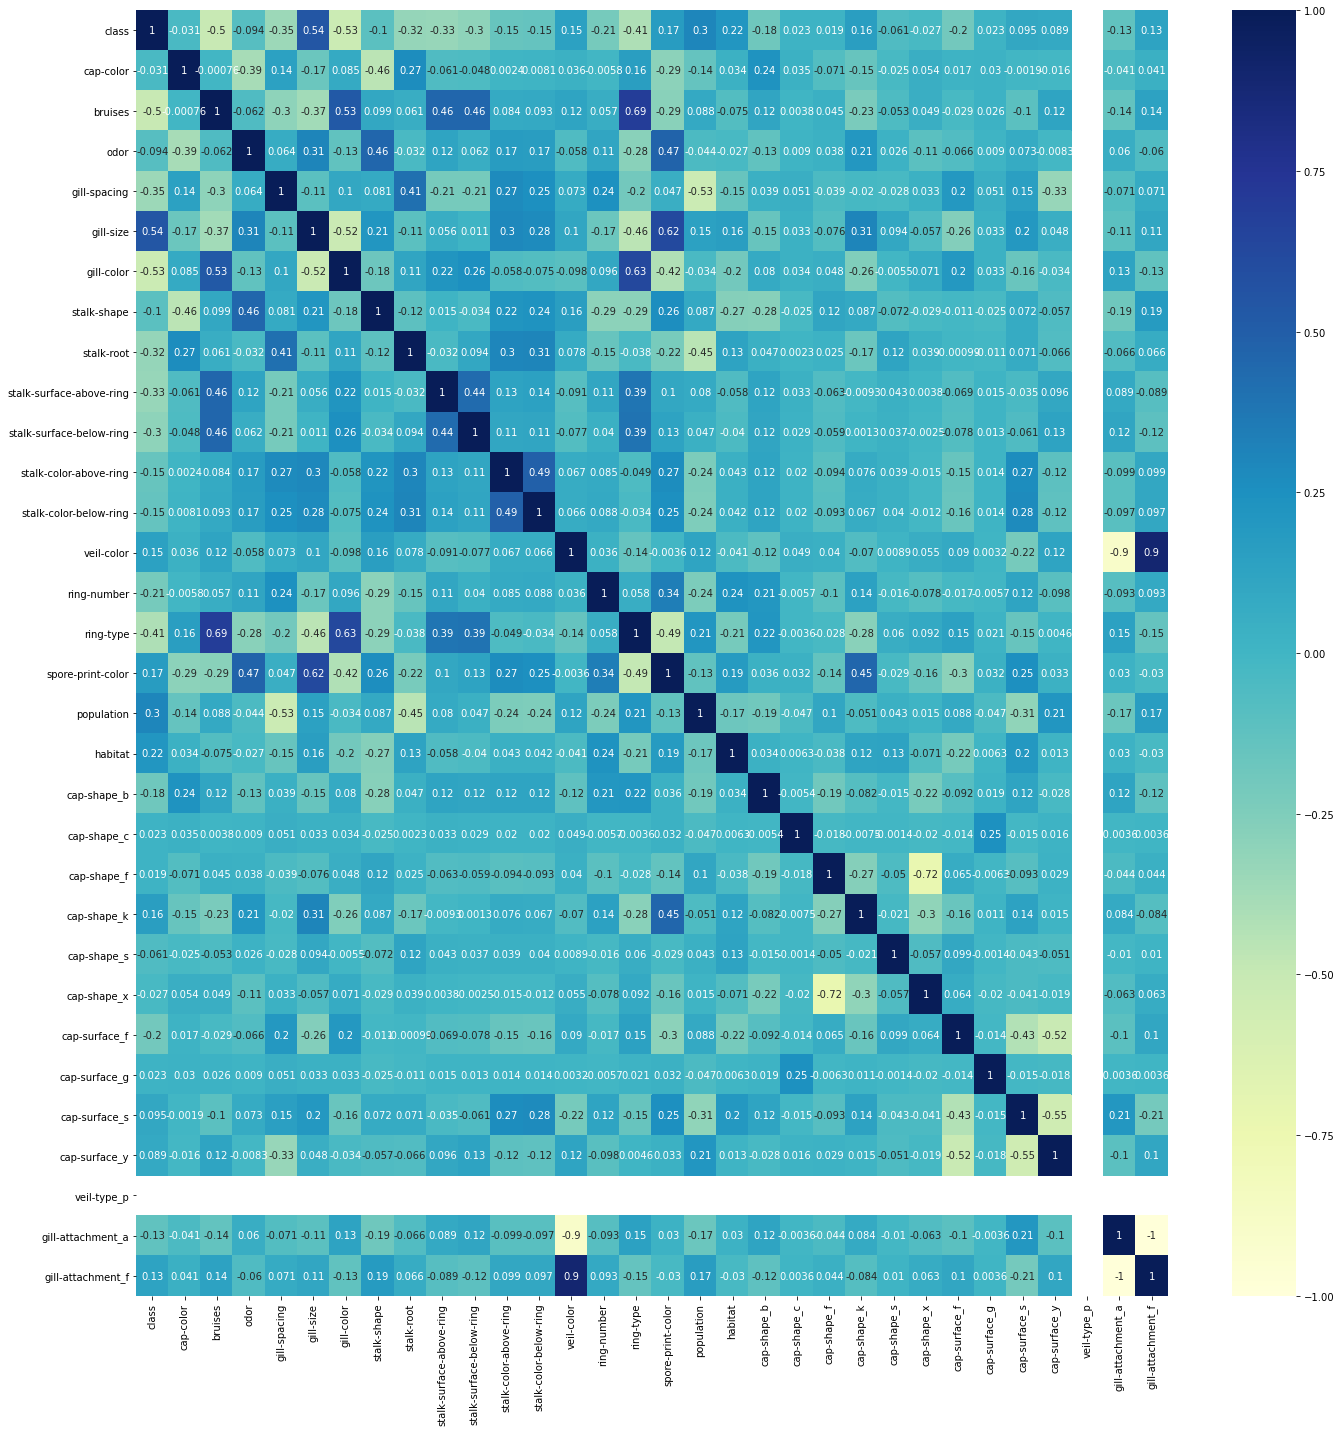

In [17]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True , cmap='YlGnBu')
plt.tight_layout()
plt.show()

gill attachment_f and gill attachment_a has strong correlation with veil color (one is strong positive and other is strong negative). So when we check the correlation of these columns with the target column 'class', veil color has more correlation in both cases. Hence we could drop the other two columns. Since veil type_p has only one value for all the rows, we could drop this also.

In [19]:
data=data.drop(['gill-attachment_f','gill-attachment_a','veil-type_p'],axis=1)
data.head()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
0,1,4,1,6,0,1,4,0,2,2,...,0,0,0,0,0,1,0,0,1,0
1,0,9,1,0,0,0,4,0,1,2,...,0,0,0,0,0,1,0,0,1,0
2,0,8,1,3,0,0,5,0,1,2,...,1,0,0,0,0,0,0,0,1,0
3,1,8,1,6,0,1,5,0,2,2,...,0,0,0,0,0,1,0,0,0,1
4,0,3,0,5,1,0,4,1,2,2,...,0,0,0,0,0,1,0,0,1,0


In [20]:
data.columns

Index(['class', 'cap-color', 'bruises', 'odor', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s',
       'cap-surface_y'],
      dtype='object')

## Modelling

### Splitting the dataset

In [21]:
#split the dataset into target and features
y = data['class']
x = data.drop(['class'], axis=1)

In [22]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [23]:
#check how many data points are there in the training set
x_train.shape

(6093, 28)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model = logit_model.fit(x_train, y_train)
y_predict = logit_model.predict(x_test)

In [25]:
#check the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.9625800098473658
Precision is : 0.9552238805970149
Recall is : 0.9687184661957619
f1 Score is : 0.9619238476953909


### kNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
#create model with varied k values
acc_values = []
#take 3 to 15 random values for k
neighbors = np.arange(3,15)
#loop to create kNN model for each k values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_predict)
    acc_values.append(acc)

In [27]:
print(acc_values)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999507631708518, 0.9970457902511078, 0.9965534219596258, 0.9955686853766618, 0.9940915805022157, 0.9940915805022157]


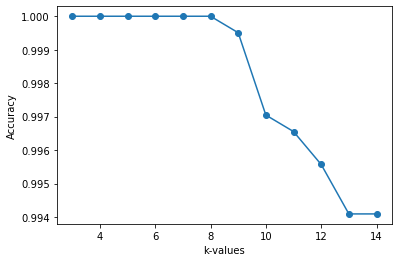

In [28]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.show()

We will take k value as 6.

In [29]:
#replace k as 6
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

In [30]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


### Radial Basis Function SVM

In [31]:
#import library
from sklearn.svm import SVC
#create an instance of the model
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train, y_train)
y_predict = svm_radial.predict(x_test)

In [32]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.9881831610044313
Precision is : 0.9938712972420838
Recall is : 0.9818365287588294
f1 Score is : 0.9878172588832487


### Decision Tree Classifier

In [33]:
#import library
from sklearn.tree import DecisionTreeClassifier
#create an instance of the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_predict = dt_model.predict(x_test)

In [34]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


### Random Forest Classifier

In [35]:
#import libraries 
from sklearn.ensemble import RandomForestClassifier
#create the instance of the model
rf=RandomForestClassifier()
#train the data
rf.fit(x_train,y_train)
#predict x_test
y_predict=rf.predict(x_test)

In [36]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


### Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [38]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


### Naive Bayes' Classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [40]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


Here all the models showed high performance, but in particular, kNN, Decision Tree, Random Forest, Gradient Boosting and Naive Bayes' Classifiers showed 100% accuracy. 